<a href="https://colab.research.google.com/github/lylemp/Data-Practice-Notebooks/blob/master/DataFrame_practice_with_Pima_Indians_Diabetes_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Connecting to Google Drive for dataset access
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_list = drive.ListFile({'q': "'1nqlKNxXn6-JsKAswMI3Vg0StwbW4980M' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))
  

     |████████████████████████████████| 993kB 5.0MB/s 
title: diabetes.csv, id: 1sDVVV21VGAbVlXe_sF9o8gT7KLF4hyKy


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [0]:
data=drive.CreateFile({'id':'1sDVVV21VGAbVlXe_sF9o8gT7KLF4hyKy'})
data.GetContentFile('diabetes.csv')

import pandas as po
dataset=po.read_csv('diabetes.csv')
dataset.head(25)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [0]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [0]:
dataset.index

RangeIndex(start=0, stop=768, step=1)

# Indexing 

## [ ]
input will be a column name, a list of column names, or a slice.

In [0]:
## Single column name specification results in a Series object
dataset["BMI"] # type Series

## A list of column names results in a DataFrame object, returning ALL rows just for those columns
dataset[["BMI"]] # type DataFrame
dataset[["BMI","Glucose"]] # type DataFrame

## Slices also result in a DataFrame object, returning rows (complete with all columns) within the index slice
dataset[0:5] #type DataFrame
dataset[0:1] #type DataFrame

## But single values result in a Series object (ONLY IF THE VALUE IS AN ACTUAL COLUMN NAME)
# dataset[0] #error

## loc[ ]
selects rows based on numeric input value

In [0]:
dataset.loc[0] # Returns data (in all columns) in the first row as a Series object

dataset.loc[0:10] # Returns data (in all columns) in rows 0 - 10 (11 total!) as a DataFrame object

dataset.loc[0:10, "BMI"] # Returns data (in the column specified) in rows 0 - 10 (11 total) as a Series object

dataset.loc[0:10, ["BMI","Glucose"]] # Returns data (in the columns specified) in rows 0 - 10 (11 total) as a DataFrame object




## iloc[ ]
Similar to loc[ ], but you can't use the specific names of the columns. Every argument must be integer based.

In [0]:
dataset.iloc[0] #literally identical to dataset.loc[0]. Returns the first row.

dataset.iloc[0:10] # literally identical to dataset.loc[0:10], except it returns rows 0-9 (10 total instead of 11).

dataset.iloc[0:11, 1] # returns the first 10 rows for the first column as a Series object

dataset.iloc[0, 0:11] # returns the first row with the data from the first 10 columns as a Series object

dataset.iloc[0:11, 0:11] # returns the first 10 rows with the first 11 columns as a DataFrame object


## Indexing practice
Give the same data using all three methods of indexing

### 1. First 10 rows of the BMI and Glucose columns as a DataFrame

In [0]:
dataset[["BMI", "Glucose"]][0:11]


In [0]:
dataset.loc[0:10,["BMI","Glucose"]]

In [0]:
dataset.iloc[0:11, [5,1]]

### 2. Index the entire Insulin column as a DataFrame

In [0]:
dataset[["Insulin"]]

In [0]:
dataset.loc[:, ["Insulin"]]

In [0]:
dataset.iloc[:, (dataset.columns == "Insulin").nonzero()[0]]

# or

dataset.iloc[:, [4]]

In [0]:
dataset.loc[:,"BMI"]
dataset["BMI"]

# DataFrame Initialization

In [0]:
import pandas as po

list1 = [1,2,3]
list2 = ['a','b','c']

df = po.DataFrame({"key1": list1,
              "key2": list2})
df
df['key2'].size

In [0]:
data = {"Name": ["Jim", "Pam", "Sam"],
        "Age": [18, 33, 27],
       "Salary":[1000, 3000, 1200]}

po.DataFrame(data)

In [0]:
po.DataFrame(data = 
    [[1,2,3], 
    ['a','b','c']],
    columns = ["key1","key2", "key3"])

# groupby

In [0]:
# 1. Create a GroupBy object 
dataset_groupby = dataset.groupby("BMI")

# 2. Apply an aggregation function (e.g. mean, count, max)
dataset_groupby.mean()

# Interpretation of the table: Based on BMI, it calculates the corresponding average values of all columns for all records with that specific BMI.

# Looking at the table, it seems low BMI (<30) don't die often (Outcome = 0.0000), but for those with BMI >30, There are several deaths (Outcome = 1.0000)

In [0]:
# We can also group by more than one column (MultiIndex!)
dataset.groupby(["BMI", "Outcome"]).mean()

# "We form groups of all records, based on their BMI. Then, in each BMI group, we group the people by their Outcome (whether they lived or died), and then
# observe the statistics for each of these groups."

## Get all age groups that have a mean BMI less than 30

In [0]:
bmis_grouped_by_age = dataset.groupby('Age').mean()[['BMI']] #double bracket BMI for DataFrame data type
bmis_grouped_by_age.head(5)

,BMI
Age,
21,27.817460
22,29.509722
23,31.502632
24,32.569565
25,31.943750


In [0]:
# Row indexing
%%time
desired_bmis_and_ages1 = bmis_grouped_by_age[bmis_grouped_by_age['BMI'] < 30]

CPU times: user 1.49 ms, sys: 0 ns, total: 1.49 ms
Wall time: 1.47 ms


In [0]:
desired_bmis_and_ages1.head(5)

,BMI
Age,
21,27.817460
22,29.509722
48,29.980000
55,27.025000
57,29.700000


In [0]:
# Alternatively, an inefficient for-loop
%%time 
# over two times slower than pandas! Scalability 0.

age_bmi_dict = bmis_grouped_by_age['BMI'].to_dict() # series.to_dict(), not DataFrame.to_dict()

desired_ages = []
desired_bmis = []

for age in age_bmi_dict:
  if age_bmi_dict[age] < 30:
    desired_ages.append(age)
    desired_bmis.append(age_bmi_dict[age])

desired_bmis_and_age2 = po.DataFrame(desired_bmis, desired_ages).rename(columns = {0:"BMI"})

CPU times: user 3.23 ms, sys: 352 µs, total: 3.58 ms
Wall time: 8.83 ms


In [0]:
desired_bmis_and_age2.head(5)

,BMI
21,27.817460
22,29.509722
48,29.980000
55,27.025000
57,29.700000


## Row Indexing for Dummies


Pseudocode:
```
df[df['some_column'] == 0]
```
This gets all rows in df where the values in 'some_column' are equal to 0.


### Example
For the diabetes dataset, let's index on the Outcome column (note: we are not indexing using the DataFrame's built-in Index; that's what .loc specializes in).

In [0]:
lives = dataset[dataset['Outcome'] == 0].head(5)
lives.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0


In [0]:
deaths = dataset[dataset['Outcome'] == 1].head(5)
deaths.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


We can then conduct preliminary data visualization on these two cohorts.

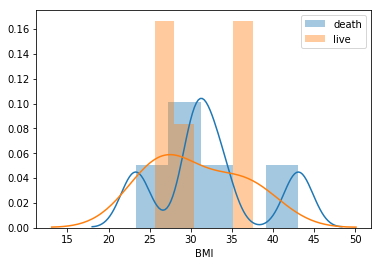

In [0]:
import seaborn as sns
sns.distplot(deaths['BMI'], bins = 5, label = 'death')
sns.distplot(lives['BMI'], bins = 5, label = 'live')
plt.legend()

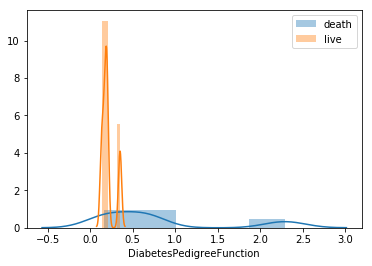

In [0]:
sns.distplot(deaths['DiabetesPedigreeFunction'], label = 'death')
sns.distplot(lives['DiabetesPedigreeFunction'], label = 'live')
plt.legend()

Alternatively, we can conduct Principal Component Analysis (PCA) to determine which features will best explain the outcome column.

# Pivot tables

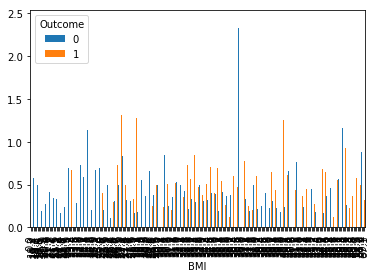

In [0]:
dataset.pivot_table(index = 'BMI',
                   columns = 'Outcome',
                   values = 'DiabetesPedigreeFunction',
                 aggfunc = np.mean).plot(kind = 'bar')